# The personalities we value most according to the enneagram

In this analysis, I'll use enneagram data to form conclusions about which personality traits are most socially desirable.  

My hypothesis is that people are more likely to believe their enneagram type accurately describes their personality if they like the traits associated with that type. On the flipside, people are more likely to say their type is innaccurate if they don't like that type's description. 

The underlying assumption here is that people protect their sense of self by embracing information that makes them feel good and rejecting information that makes them feel bad. Therefore, people are more likely to believe an enneagram type description is accurate if that type has valuable or attractive qualities. 

Depending on the findings of this analysis, I'll draw some conclusions about which personality traits are more and less desired and what that says about the world we live in.

If you're not familiar with the enneagram, I provide a brief overview here. 

## What is the enneagram and why does it matter?

I've taken many personality tests throughout my life. Of the ones I've taken, the enneagram is hands down the most accurate. 

The nitty gritty simplified version is that every person has a basic type that represents their core personality. There's debate about how people come to develop their type (ie nature versus nurture) but what's important is that, once formed, it doesn't change. 

You are who are you but who you are at your best and your worst matters too- which the enneagram also accounts for. Each type shows certain behaviors when they're at their best ("growth") and  worst ("stress"). 

The types are organized into three centers: gut, head, and heart. The center describes the dominant emotions of that type. 

https://images.squarespace-cdn.com/content/v1/585179fe1b631b51e1837bac/1481830705381-FMNUA25BWM3H4KHDVIUI/image-asset.gif?format=750w

- Gut (instinctive): Types Eight, Nine and One

Gut enenagram types are most likley to feel anger/rage and instinctively act on those feelings (but not neccesarily consciouly). They instintively respond with anger/rage (but not neccesarily consciously). 

- Heart: Types Two, Three and Four

Heart types are most likely to feel things deeply and act on those emotions. They struggle with feelings of shame.

- Head: Types Five, Six and Seven

Head types are thinking types and respond based on what their minds tell them to do.  They are most likely to be plagued by fear/anxiety.



Here's a picture showing how the types fit together [add pic] and a high level list of the type descriptions below. If you'd like to take the test, here's a free on I like. If you're inspired by my analysis and looking to spend some $$, I'd reccomend the one from the Enneagram Insitute. 


They are as follows https://www.enneagraminstitute.com/type-descriptions:

1 THE REFORMER
The Rational, Idealistic Type: Principled, Purposeful, Self-Controlled, and Perfectionistic

2 THE HELPER
The Caring, Interpersonal Type: Demonstrative, Generous, People-Pleasing, and Possessive

3 THE ACHIEVER
The Success-Oriented, Pragmatic Type: Adaptive, Excelling, Driven, and Image-Conscious

4 THE INDIVIDUALIST
The Sensitive, Withdrawn Type: Expressive, Dramatic, Self-Absorbed, and Temperamental

5 THE INVESTIGATOR
The Intense, Cerebral Type: Perceptive, Innovative, Secretive, and Isolated

6 THE LOYALIST
The Committed, Security-Oriented Type: Engaging, Responsible, Anxious, and Suspicious

7 THE ENTHUSIAST
The Busy, Fun-Loving Type: Spontaneous, Versatile, Distractible, and Scattered

8 THE CHALLENGER
The Powerful, Dominating Type: Self-Confident, Decisive, Willful, and Confrontational

9 THE PEACEMAKER
The Easygoing, Self-Effacing Type: Receptive, Reassuring, Agreeable, and Complacent

 

# Data Cleanup

In [20]:
# Import pandas, pandasql, sklearn, seborn and regex

import pandas as pd
from pandasql import sqldf
import seaborn as sns 
import regex as re


# Create a dataframe from the raw data

types = pd.read_csv('dataset.csv')

# Create a new df the columns we need

types_subset = types[["enneagram","wing", "accuracy.enneagram","timestamp"]]

# Create a function to extract the number from the enneagram string

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

# Using the function above, create a new column that has the enneagream in the form of a number for readibliity 

types_subset['typenum']=types_subset['enneagram'].apply(lambda x: find_number(x))

# Relabel the accuracy column for readibility and understanding

types_subset.rename(columns = {'accuracy.enneagram':'perceived_accuracy'}, inplace = True)

# Create new column for heart, head and body types

types_subset

/var/folders/m7/pr2047y173x50c8xddxm6ndr0000gn/T/ipykernel_37910/1469054755.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  types_subset['typenum']=types_subset['enneagram'].apply(lambda x: find_number(x))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,enneagram,wing,perceived_accuracy,timestamp,typenum
0,Type 1 (the Reformer or Perfectionist),1w2 (the Advocate),5,8/2/2017 11:22,1
1,Type 5 (the Investigator or Observer),5w4 (the Iconoclast),4,8/2/2017 11:29,5
2,Type 8 (the Protector or Challenger),8w9 (the Bear),4,8/2/2017 11:30,8
3,Type 8 (the Protector or Challenger),NaN,2,8/2/2017 11:32,8
4,Type 6 (the Loyalist or Loyal Skeptic),NaN,4,8/2/2017 11:35,6
...,...,...,...,...,...
2797,Type 3 (the Performer or Achiever),NaN,4,9/18/2020 16:18,3
2798,Type 4 (the Individualist or Romantic),4w5 (the Bohemian),5,9/22/2020 22:31,4
2799,Type 6 (the Loyalist or Loyal Skeptic),6w5 (the Defender),4,9/23/2020 16:04,6
2800,Type 8 (the Protector or Challenger),8w7 (the Independent),5,9/24/2020 19:05,8


In [21]:
q = "SELECT enneagram, COUNT(typenum) AS 'Number of people per type' FROM types_subset GROUP BY typenum"

sqldf(q, locals())

,enneagram,Number of people per type
0,Type 1 (the Reformer or Perfectionist),337
1,Type 2 (the Helper or Giver),388
2,Type 3 (the Performer or Achiever),192
3,Type 4 (the Individualist or Romantic),406
4,Type 5 (the Investigator or Observer),345
5,Type 6 (the Loyalist or Loyal Skeptic),347
6,Type 7 (the Enthusiast or Epicure),176
7,Type 8 (the Protector or Challenger),152
8,Type 9 (the Peacemaker or Mediator),459


## Exploring the enneagram using summary statistics 

In this portion, I'll use central tendency statistics (mean and mode) and visualizations to answer questions about our enneagram dataset. I will not be using the median since there are no outliers in this dataset. 

### Mean: are certain enneagram types more likely to believe that the results accurately describe their personality? 

When people report their enneagram type, they're also asked how accurate the enneagram is describing their personality.

My theory is that types that tend to be more aggreeable (9, 2, 3) are more likely to report their enneagram as being accurate whereas more disagreeable types (1, 8, 4) are likely to have lower perceived accuracy scores. 

Is my theory correct? Let's find out. 


In [22]:
q = "SELECT enneagram, AVG(perceived_accuracy) AS 'Perceived Accuracy' FROM types_subset GROUP BY enneagram"

sqldf(q, locals())


,enneagram,Perceived Accuracy
0,Type 1 (the Reformer or Perfectionist),4.002967
1,Type 2 (the Helper or Giver),3.927835
2,Type 3 (the Performer or Achiever),4.151042
3,Type 4 (the Individualist or Romantic),4.108374
4,Type 5 (the Investigator or Observer),3.704348
5,Type 6 (the Loyalist or Loyal Skeptic),3.913545
6,Type 7 (the Enthusiast or Epicure),3.977273
7,Type 8 (the Protector or Challenger),4.197368
8,Type 9 (the Peacemaker or Mediator),4.063181


In [23]:
types_subset.groupby("enneagram")["perceived_accuracy"].mean().sort_values()

enneagram
Type 5 (the Investigator or Observer)     3.704348
Type 6 (the Loyalist or Loyal Skeptic)    3.913545
Type 2 (the Helper or Giver)              3.927835
Type 7 (the Enthusiast or Epicure)        3.977273
Type 1 (the Reformer or Perfectionist)    4.002967
Type 9 (the Peacemaker or Mediator)       4.063181
Type 4 (the Individualist or Romantic)    4.108374
Type 3 (the Performer or Achiever)        4.151042
Type 8 (the Protector or Challenger)      4.197368
Name: perceived_accuracy, dtype: float64

### Analysis: We value people who look out for themselves

Of those that find the enneagram most accurate in describing their personality are eights, threes and fours. 

The type that is least likely to believe their type accurately descibes their personality are fives, followed by sixes and then twos. 

If we compare the qualities between types with the highest and lowest perceived accuracy, we learn that types that exhibit more selfishness are most likely to perceive their description as accurate. 

Eights are the most dominant and strong-willed type. Threes are the "go getters" of the enneagram and four the romantics. These are three very different types but they all show a strong degree of focus on self and a strong desire to get their needs met.

Now, we can turn to those types that are least likely to perceive their enenagram as accurate: fives, sixes and twos. At first glance, these three types have very little in common. Fives are the thinkers, sixes the "go down with the ship" loyalists and twos the nurtures. 




### Understanding our data

Text(0.5, 0, 'Enneagram type by count')

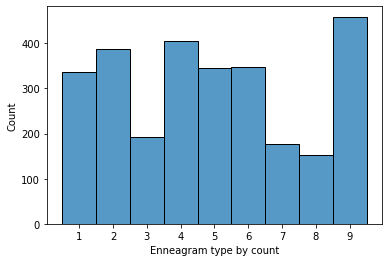

In [24]:
# Create new dataframe to sort the values so they show in order

sorted = types_subset.sort_values('typenum')

# Create histogram 

count_enneagram_hist = sns.histplot(data=sorted, x="typenum")

# Label and generate the histogram

count_enneagram_hist.set_xlabel("Enneagram type by count")